In [1]:
using Plots
using LaTeXStrings
using QuadGK
using Roots

# Lucas Schmidt Ferreira de Araujo

## Problem 01

* a)

We consider the integral

$$ E(\lambda,1) = \int_{\lambda}^{\infty} \frac{e^{-t}}{t}dt$$

We start by calculating

$$ E(\lambda,k) = \int_{\lambda}^{\infty} \frac{e^{-t}}{t^k}dt = -e^{-t}\frac{1}{t^k}|_{\lambda}^{\infty} - \int_{\lambda}^{\infty} -e^{-t} \frac{k}{t^{k+1}}dt $$

$$ = \frac{e^{-\lambda}}{\lambda^k} - k\int_{\lambda}^{\infty} \frac{e^{-t}}{t^{k+1}} dt = \frac{e^{-\lambda}}{\lambda^k} - kE(\lambda,k+1) $$

Then

$$ E(\lambda,1) = \frac{e^{-\lambda}}{\lambda} - E(\lambda,2) $$

$$ -E(\lambda,2) = -\frac{e^{-\lambda}}{\lambda^2} + 2E(\lambda,3) $$

$$ E(\lambda,3) = \frac{e^{-\lambda}}{\lambda^3} - 3E(\lambda,4) $$

Substituting we have

$$ E(\lambda,1) = \sum_{j=0}^{N} e^{-\lambda}\frac{(-1)^{N-1}(N-1)!}{\lambda^j} + (-1)^{N}N! E(\lambda,N+1)$$

* b) 

We have

$$ E(\lambda,k+1) = \int_{\lambda}^{\infty} \frac{e^{-t}}{t^{k+1}}dt \leq \sup_{t\in[\lambda,\infty]}{\frac{1}{t^{k+1}}} \int_{\lambda}^{\infty} e^{-t}dt $$

$$ = \frac{1}{\lambda^{k+1}} e^{-\lambda}$$

Then 

$$ E(\lambda,k) \leq \frac{1}{\lambda^{k+1}} e^{-\lambda} , \quad E(\lambda,k) \rightarrow \infty , \quad \lambda \rightarrow 0$$

* c)

$$ r_n(\lambda) = o( \frac{(n-1)! e^{-\lambda} }{\lambda^n} ) , \quad \lambda \rightarrow \infty$$

We need to show

$$ \lim_{\lambda \rightarrow \infty} | \frac{r_k(\lambda)}{f(\lambda)}| = 0 , \quad f_k(\lambda) = \frac{(k-1)! e^{-\lambda} }{\lambda^k} $$

$$ \frac{r_k(\lambda)}{f_k(\lambda)} = (-1)^k k \lambda^k e^{\lambda} \int_{\lambda}^{\infty} \frac{e^{-t}}{t^{k+1}}dt $$

$$ | \frac{r_k(\lambda)}{f_k(\lambda)} | = | (-1)^k k \lambda^k e^{\lambda} \int_{\lambda}^{\infty} \frac{e^{-t}}{t^{k+1}}dt | < |k \lambda^k e^{\lambda} \frac{1}{\lambda^{k+1}}e^{-\lambda}| = |\frac{k}{\lambda}|$$

From Sandwich Theorem

$$ \lim_{\lambda \rightarrow \infty} | \frac{r_k(\lambda)}{f(\lambda)}| = 0 , \quad \lambda \rightarrow \infty $$

* d) 

We have that

$$ S_n = \sum_{j=0}^n (-1)^{j}\frac{j!}{\lambda^{(j+1)}} $$

Then

$$ | S_n - S_{n-1} | = | \frac{n!}{\lambda^{(n+1)}} | = g(n) $$

We note that the sequences $g(n)$ is increasing

$$ g(n) = \frac{n!}{\lambda^{(n+1)}} = \frac{n}{\lambda}g(n-1) $$

$$ \frac{g(n)}{g(n-1)} = \frac{n}{\lambda} > 0 $$

Then 

$$ | S_n - S_{n-1} | = | \frac{n!}{\lambda^{(n+1)}} | > \infty, \quad n \rightarrow \infty$$

* e)

We have that 

$$ |r_k(\lambda)| = |k! \int_{\lambda}^{\infty} \frac{e^{-t}}{t^{k+1}}dt | \leq |\frac{k!}{\lambda^{k+1} } e^{-\lambda}| \leq 10^{-8} $$

$$ \sum_{i=1}^{k}\log{j} - \lambda - (k+1)\log{\lambda} \leq -8 \log{10}$$

In [2]:
function E(λ)
    f(t) = exp(-t) / t
    return quadgk(f,λ,Inf)[1]
end

function supE(λ,k)
    return exp(-λ) / (λ^(k+1))
end

function E_approx(λ , N)
    return exp(-λ) * sum( [ (-1)^q * factorial(big(q)) / (λ^(q+1))  for q in 0:N] )
end

function estimate(k)
    return sum( [log(q) for q in 1:k] ) - λ - (k+1) * log(λ) + 8 * log(10)
end


function rk_f(k,λ)
    f(t) = exp(1)^(-t) / (t^(k+1))
    return (-1)^k * k * quadgk(f,λ,Inf)[1] * λ^(k) * exp(1)^(λ)
end

rk_f (generic function with 1 method)

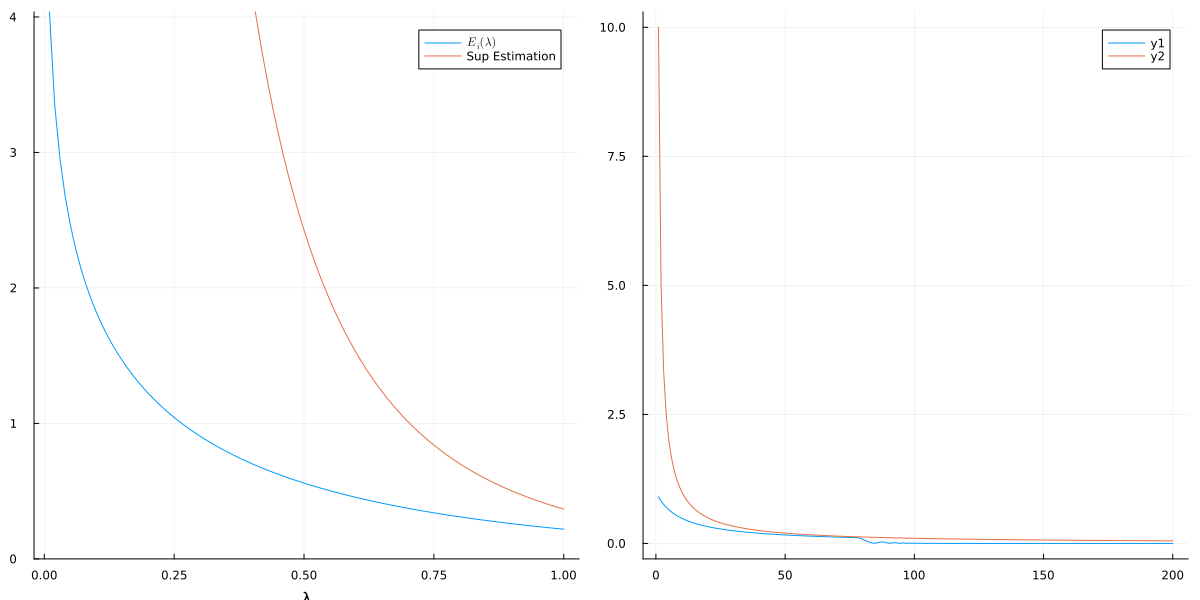

In [3]:
λ = range(0.01,1,100);
λ_ = range(1,200)
k = 10

p1 = plot(λ , E.(λ) , ylims=(0 , maximum(E.(λ)) ) , label = L"E_i(\lambda)" , xlabel = "λ")
plot!(λ , supE.(λ,1) , label="Sup Estimation")

p2 = plot(λ_ ,  abs.(rk_f.(k,λ_)) )
plot!(λ_ , abs.(k ./ λ_) )

plot(p1,p2,size=(1200,600))

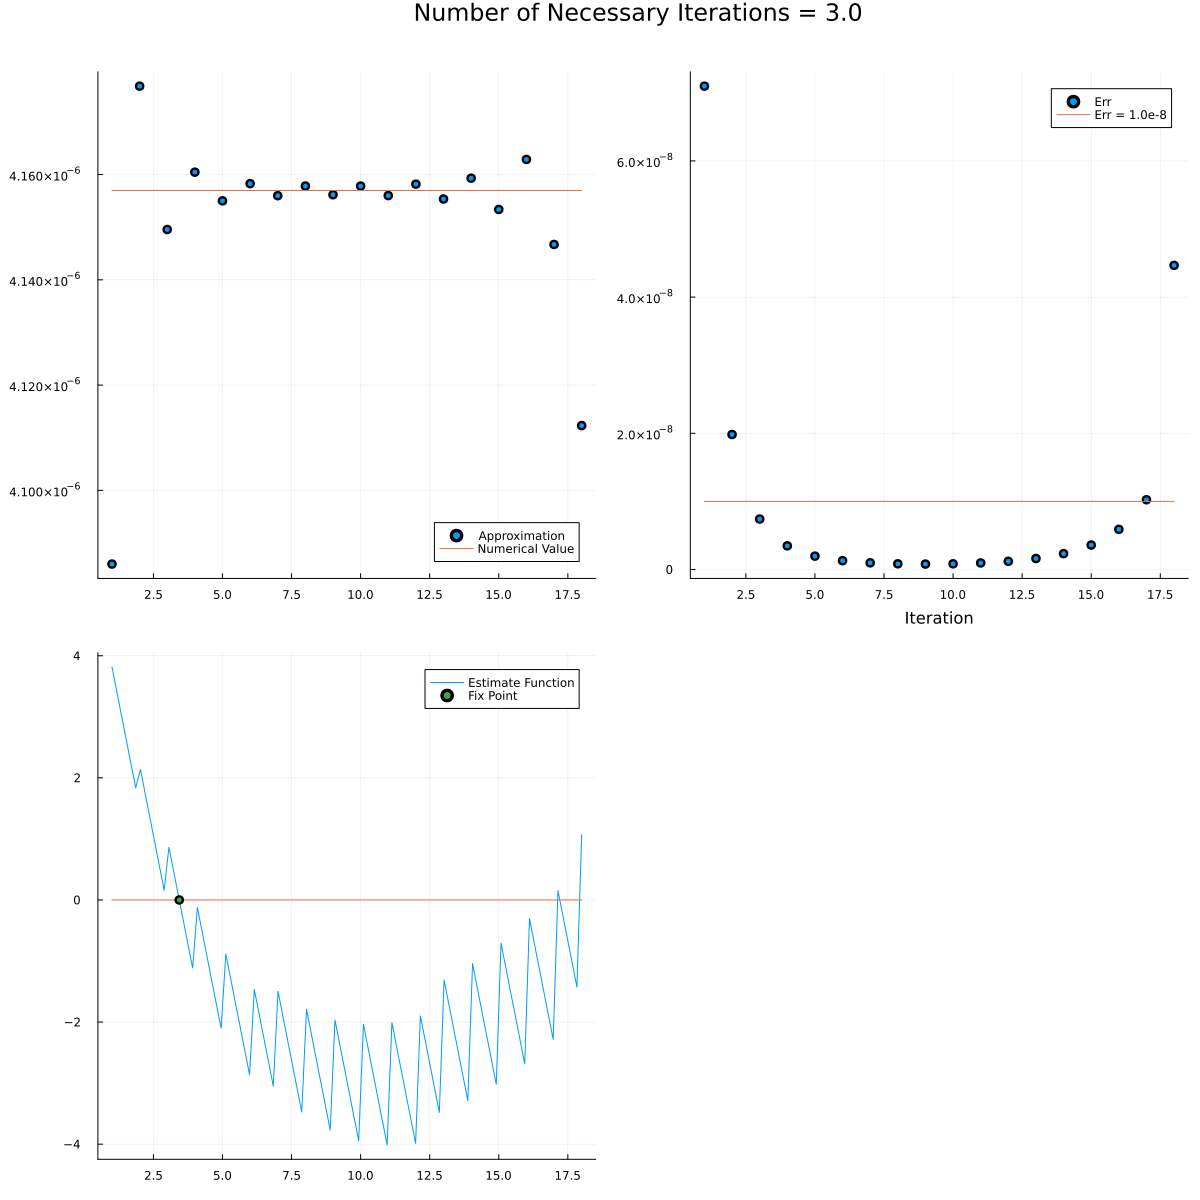

In [6]:
λ = 10
N = range(1,18)
N_ = range(1,18,100)
N_iterations = find_zero(estimate,(2,10),Bisection())

p1 = scatter(N , E_approx.(λ,N) , label = "Approximation")
plot!(N , [E(λ) for q in N] , label = "Numerical Value")

p2 = scatter( N , abs.(E_approx.(λ,N) .- E(λ) ) , xlabel="Iteration" , label = "Err" )
plot!(N , [10^(-8) for q in N] , label = "Err = $(10^(-8))")

p3 = plot( N_ , estimate.(N_) , label = "Estimate Function")
plot!( N_ , [0 for q in N_] , label = false)
scatter!([N_iterations] , [0] , label = "Fix Point")

plot( p1 , p2 , p3  , size = (1200,1200) , suptitle = "Number of Necessary Iterations = $(floor(N_iterations)) ")